# INTRO TO SCIKIT

# Data Representation in Scikit-Learn

In [ ]:
The best way to think about data within Scikit-Learn is in terms of tables of data.

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
Rows:
  - Here each row of the data refers to a single observed flower
  - In general, we will refer to the rows of the matrix as samples, and the number of rows as n_samples

Columns:
  - each column of the data refers to a particular quantitative piece of information that describes each sample. 
  - In general, we will refer to the columns of the matrix as features, and the number of columns as n_features.

Features matrix
  - this is a 2 dimensional numerical array or matrix, which we will call the features matrix. 
  - By convention, this features matrix is often stored in a variable named X. 
  - The features matrix is assumed to be two-dimensional
      - with shape [n_samples, n_features]
      - is most often contained in a NumPy array or a Pandas DataFrame

Target array
  - In addition to the feature matrix X, we also generally work with a label or target array, which by convention we will usually call y. 
  - The target array is usually one dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series. 
  - The target array may have continuous numerical values, or discrete classes/labels
  - the target array is usually the quantity that we want to predict from the data - it is the dependent variable
 

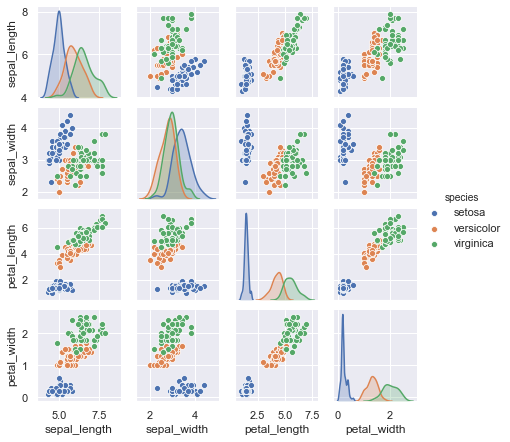

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [4]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Scikit-Learn's Estimator

## Principles

In [ ]:
- Consistency:               All objects share a common interface drawn from a limited set of methods, with consistent documentation.
    
- Inspection:                All specified parameter values are exposed as public attributes.
    
- Limited object hierarchy:  Only algorithms are represented by Python classes;
                             Datasets are represented in standard formats:
                               - NumPy arrays, Pandas DataFrames, SciPy sparse matrices
                               - Parameter names use standard Python strings
                    
- Composition:               Many machine learning tasks can be expressed as sequences of more fundamental algorithms
                             Scikit-Learn makes use of this wherever possible.
        
- Sensible defaults:         When models require user-specified parameters, the library defines an appropriate default value.

## Basics

In [ ]:
Most commonly, the steps in using the Scikit-Learn estimator are as follows:
1 Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2 Choose model hyperparameters by instantiating this class with desired values.
3 Arrange data into a features matrix and target vector.
4 Fit the model by calling the fit() method of the model instance.
5 Apply the Model to new data:
  - For supervised learning, often we predict labels for unknown data using the predict() method.
  - For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.


## Example with Simple Linear Regression (Supervised learning)

In [ ]:
Lets build a dummy dataset

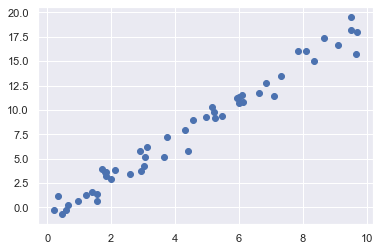

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

### 1 Chose a class of model

In [ ]:
In Scikit-Learn, every class of model is represented by a Python class. 
So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class.

Note that other more general linear regression models exist as well (OLS, LAsso, Elastic net, OMP, Logistic, GLR, etc )
https://scikit-learn.org/stable/modules/linear_model.html

In [6]:
# here 

from sklearn.linear_model import LinearRegression

### 2 Chose model hyperparameters

In [ ]:
A class of model is not the same as an instance of a model.
Once we have decided on our model class, there are still some options open to us. 

Depending on the model class we are working with, we might need to answer one or more questions like the following:
  - Would we like to fit for the offset (i.e., y-intercept)?
  - Would we like the model to be normalized?
  - Would we like to preprocess our features to add model flexibility?
  - What degree of regularization would we like to use in our model?
  - How many model components would we like to use?

In [7]:
# For our linear regression example, we can 
#  - instantiate the LinearRegression class 
#  - specify that we would like to fit the intercept using the fit_intercept hyperparameter

model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3 Arrange data into a features matrix and target vector

In [ ]:
Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. 
Here
  - our target variable y is already in the correct form (a length-n_samples array)
  - we need to massage the data x to make it a matrix of size [n_samples, n_features]


In [8]:
# In this case, this amounts to a simple reshaping of the one-dimensional array:

X = x[:, np.newaxis]
X.shape


(50, 1)

### 4 Fit the model to the data

In [9]:
# Now it is time to apply our model to data. This can be done with the fit() method of the model:

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores
# for example in this linear model, we have the following:

model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311164

### 5 Predict labels for unknown data

In [ ]:
Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the predict() method. 



In [12]:
# For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

xfit = np.linspace(-1, 11)

In [13]:
# As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

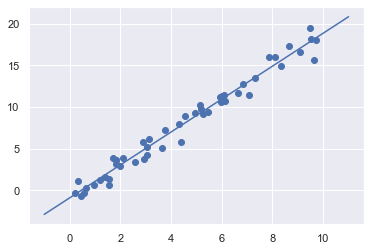

In [14]:
# Finally, let's visualize the results by plotting first the raw data, and then this model fit:

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Supervised learning example: Iris Classification

In [ ]:
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?
    
For this task, we will use an extremely simple generative model known as Gaussian naive Bayes.
Gaussian naive Bayes model
- proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution
- is a good baseline classification model because it is so fast and has no hyperparameters to choose


In [16]:
# We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set.

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


In [17]:
# With the data arranged, we can follow our recipe to predict the labels:

from sklearn.naive_bayes import GaussianNB   # 1. choose model class
model = GaussianNB()                         # 2. instantiate model
model.fit(Xtrain, ytrain)                    # 3. fit model to data
y_model = model.predict(Xtest)               # 4. predict on new data


In [19]:
# Finally, we can use the accuracy_score utility to see the fraction of predicted labels that match their true value:

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised learning example: Iris dimensionality

In [ ]:
As an example of an unsupervised learning problem, lets take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample
    
The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. 
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!
    
Here we will use principal component analysis, which is a fast linear dimensionality reduction technique. 
We will ask the model to return two components—that is, a two-dimensional representation of the data.

In [20]:

from sklearn.decomposition import PCA    # 1. Choose the model class
model = PCA(n_components=2)              # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                        # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)           # 4. Transform the data to two dimensions

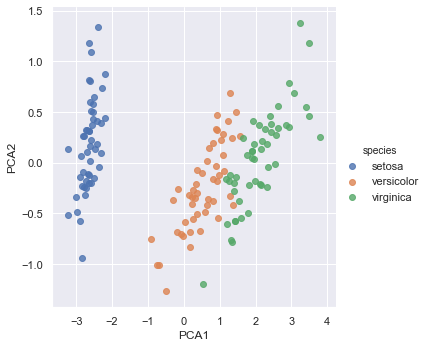

In [21]:
# Now let's plot the results. A quick way to do this is to insert the results into the original Iris DataFrame, and use Seaborn's lmplot to show the results:

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [ ]:
We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

## Unsupervised learning: Iris clustering

In [ ]:
Lets next look at applying clustering to the Iris data. 
A clustering algorithm attempts to find distinct groups of data without reference to any labels. 

Here we will use a powerful clustering method called a Gaussian mixture model (GMM).
A GMM attempts to model the data as a collection of Gaussian blobs.


In [23]:
# We can fit the Gaussian mixture model as follows:

from sklearn import mixture                                                 # 1. Choose the model class
model = mixture.GaussianMixture(n_components=3, covariance_type='full')     # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                                                           # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                                               # 4. Determine cluster labels

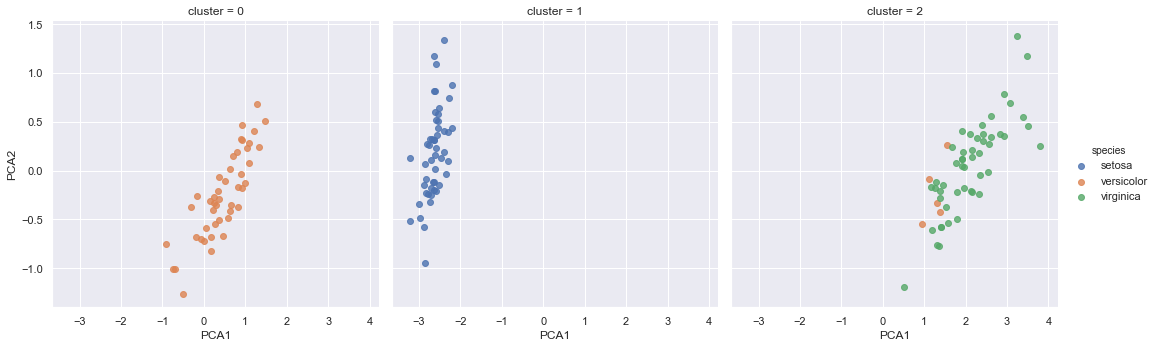

In [24]:
# we will add the cluster label to the Iris DataFrame and use Seaborn to plot the results:

iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

In [ ]:
By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying labe
  - the setosa species is separated perfectly within cluster 0
  - there remains a small amount of mixing between versicolor and virginica. 


## Application: Exploring hand-written digits

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

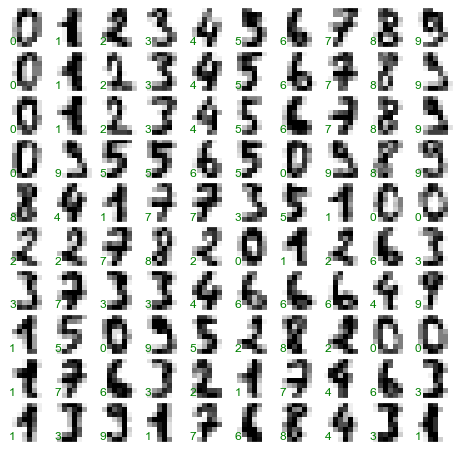

In [26]:
# Let's visualize the first hundred of these:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
In order to work with this data within Scikit-Learn, we need a two-dimensional, [n_samples, n_features] representation.
By treating each pixel in the image as a feature: by flattening out the pixel arrays we have a length-64 array of pixel values representing each digit. 
    
Additionally, we need the target array, which gives the previously determined label for each digit. 
These two quantities are built into the digits dataset under the data and target attributes, respectively:

In [29]:
X = digits['data']
X.shape

(1797, 64)

In [30]:
y = digits['target']
y.shape

(1797,)

#### Dimensionality reduction

In [ ]:
We would like to visualize our points within the 64-dimensional parameter space but it is quite difficult.
Instead we will reduce the dimensions to 2, using an unsupervised method. 

Here, we'll make use of a manifold learning algorithm called Isomap, and transform the data to two dimensions:

In [33]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits['data'])
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

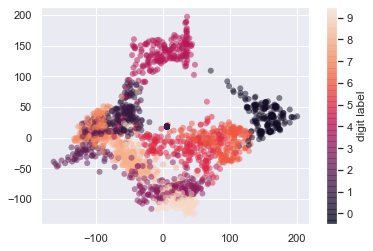

In [36]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [ ]:
This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. 

For example, zeros and ones have very little overlap in parameter space. 
Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle. 
On the other hand, there seems to be a more or less continuous spectrum between ones and fours.

#### Classification on digits

In [ ]:
Lets apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [38]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [39]:
# Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

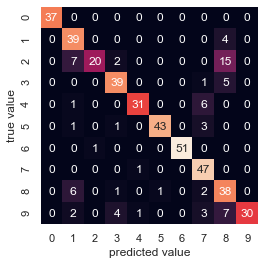

In [40]:
# lets look at the confusion matrix

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');


In [ ]:
This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights. 
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. 
We'll use green for correct labels, and red for incorrect labels:

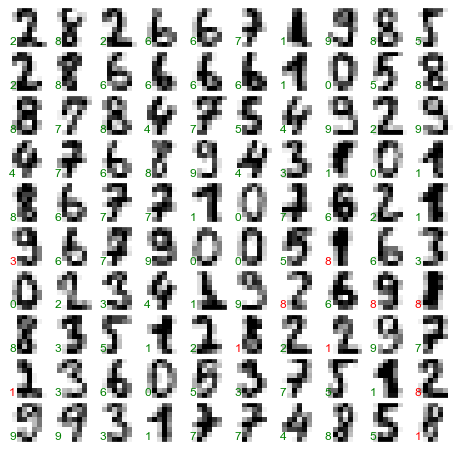

In [41]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

In [ ]:
Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally. 
To go beyond our 80% classification rate, we might move to models such as support vector machines, random forests or another classification approach.